Q1: Difference between K-Means and Hierarchical Clustering with Use Cases

Answer:

K-Means

Partitional clustering algorithm.

Requires number of clusters k in advance.

Fast and efficient for large datasets.

Example Use Case: Customer segmentation in retail.

Hierarchical Clustering

Builds a tree-like structure (dendrogram).

No need to specify number of clusters upfront (can be decided by cutting the tree).

More interpretable, but computationally expensive.

Example Use Case: Document/topic clustering for research articles.





Q2: Purpose of the Silhouette Score

Answer:

The Silhouette Score measures how well objects are clustered.

Formula:

𝑠
=
𝑏
−
𝑎
max
⁡
(
𝑎
,
𝑏
)
s=
max(a,b)
b−a
	​


Where:

a = average distance between a point and all other points in the same cluster.

b = average distance between a point and all other clusters.

Range: [-1, 1]

+1 → well-clustered.

0 → overlapping clusters.

-1 → wrongly assigned cluster.



Q3: Core Parameters of DBSCAN

Answer:

eps (ε):

Maximum distance between two points to be considered neighbors.

Larger eps = bigger clusters.

min_samples:

Minimum number of neighbors required to form a dense region.

Higher min_samples = fewer, denser clusters.

metric:

Distance metric used (default = Euclidean).



Q4: Importance of Feature Scaling

Answer:

Many clustering algorithms (K-Means, DBSCAN) use distance metrics (e.g., Euclidean).

Features with larger ranges dominate smaller ones if not scaled.

Scaling ensures fair contribution of all features.

Example: Income (0–100k) vs Age (18–70). Without scaling, income dominates clustering.

Q5: Elbow Method in K-Means

Answer:

Elbow Method plots the number of clusters k vs Within-Cluster Sum of Squares (WCSS).

As k increases, WCSS decreases.

The "elbow point" (sharp bend) indicates the optimal number of clusters.

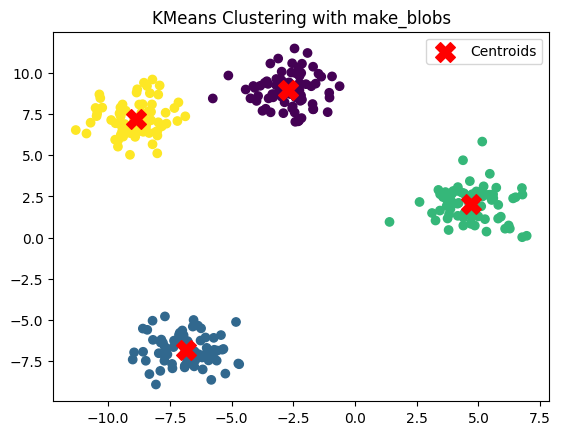

In [2]:
#Q6: KMeans on make_blobs dataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("KMeans Clustering with make_blobs")
plt.legend()
plt.show()

In [3]:
#Q7: DBSCAN on Wine Dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found:", n_clusters)


Number of clusters found: 0


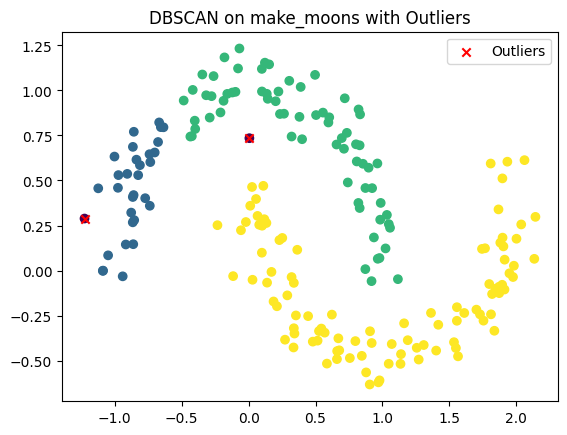

In [4]:
#Q8: DBSCAN on make_moons dataset
from sklearn.datasets import make_moons

# Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot with outliers
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(X[labels==-1,0], X[labels==-1,1], c='red', marker='x', label='Outliers')
plt.title("DBSCAN on make_moons with Outliers")
plt.legend()
plt.show()

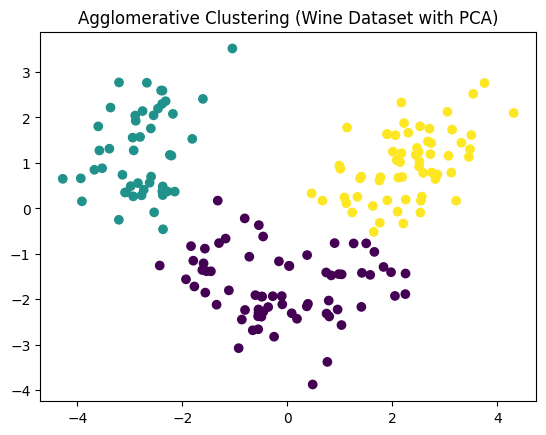

In [5]:
#Q9: Agglomerative Clustering on Wine dataset with PCA
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering (Wine Dataset with PCA)")
plt.show()

Q10: Real-World Workflow – Customer Segmentation in E-Commerce

Answer:

Clustering Algorithm

Start with K-Means (scalable, interpretable).

If data has complex shapes → use DBSCAN or Hierarchical Clustering.

Preprocessing Steps

Handle missing values (impute or drop).

Apply feature scaling (StandardScaler/MinMaxScaler).

Convert categorical features (One-Hot Encoding).

Determine Number of Clusters

Use Elbow Method and Silhouette Score.

Business Impact

Marketing team can run targeted promotions.

Identify high-value customers (loyalty programs).

Detect at-risk customers (churn prediction).

Optimize inventory and product recommendations.

In [6]:


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Example preprocessing (pseudo-code, since dataset not provided)
# customer_data = pd.read_csv("ecommerce_customers.csv")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X = features

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Evaluate
print("Silhouette Score:", silhouette_score(X_scaled, labels))


Silhouette Score: 0.38385320368772957
